In [2]:
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [50]:
# df, meta = prs.read_sav('GSS7218_R3.sav')
# df, meta = prs.read_sav('gss7222_r3.sas7bdat')
# import sas7bdat file
df, meta = prs.read_sas7bdat('gss7222_r3.sas7bdat')


In [51]:
# Get the column names
column_names = df.columns
print(column_names)

# Get column descriptions
column_labels = meta.column_labels
# print(column_labels)

# Convert to a dictionary that returns the column name given the column number
column_dict = {column_names[i] : i  for i in range(len(column_names))}

# Print the last 5 rows of the dataframe
print(df.tail())



Index(['YEAR', 'ID', 'WRKSTAT', 'HRS1', 'HRS2', 'EVWORK', 'OCC', 'PRESTIGE',
       'WRKSLF', 'WRKGOVT',
       ...
       'AGEHEF12', 'AGEHEF13', 'AGEHEF14', 'ADULTSINHH', 'HOMPOPH',
       'HHTYPE1_EXP', 'WTSSPS_NEA', 'WTSSNRPS_NEA', 'WTSSPS_NEXT',
       'WTSSNRPS_NEXT'],
      dtype='object', length=6691)
         YEAR      ID  WRKSTAT  HRS1  HRS2  EVWORK  OCC  PRESTIGE  WRKSLF  \
72385  2022.0  3541.0      1.0  48.0   NaN     NaN  NaN       NaN     2.0   
72386  2022.0  3542.0      1.0  50.0   NaN     NaN  NaN       NaN     2.0   
72387  2022.0  3543.0      1.0  38.0   NaN     NaN  NaN       NaN     2.0   
72388  2022.0  3544.0      1.0  40.0   NaN     NaN  NaN       NaN     2.0   
72389  2022.0  3545.0      1.0  40.0   NaN     NaN  NaN       NaN     2.0   

       WRKGOVT  ...  AGEHEF12  AGEHEF13  AGEHEF14  ADULTSINHH  HOMPOPH  \
72385      NaN  ...       NaN       NaN       NaN         6.0      6.0   
72386      NaN  ...       NaN       NaN       NaN         NaN      1.0   
7238

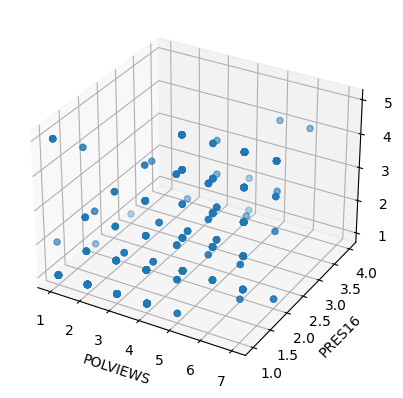

In [52]:
# Extract a vector for a given person (defined by ID) in a given year
def extract_person(df, id, year):
    return df[(df['ID'] == id) & (df['YEAR'] == year)]



# Extract a random set of vectors
random_set_of_vectors = df.sample(10000)

# Convert this set to a numpy array
random_set_of_vectors = random_set_of_vectors.to_numpy()

# Select three columns in the array and plot in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Select three columns in the array and plot in 3D space
x = column_dict['POLVIEWS']
y = column_dict['PRES16']
z = column_dict['MARHOMO']


x = random_set_of_vectors[:, x]
y = random_set_of_vectors[:, y]
z = random_set_of_vectors[:, z]

ax.scatter(x, y, z)

ax.set_xlabel('POLVIEWS')
ax.set_ylabel('PRES16')
ax.set_zlabel('MARHOMO')

plt.show()


In [56]:
# Limit to a random set of column vectors
# reduced_set = df.sample(1000, axis=1)

# Get reduce to a set of columns
# column_codes = ['SPANKING', 'HOMOSEX', 'PRES16', 'POLVIEWS', 'MARHOMO']
column_codes = ["YEAR","PARTYID","VOTE68","PRES68","IF68WHO","VOTE72","PRES72","IF72WHO","VOTE76","PRES76","IF76WHO","VOTE80","PRES80","IF80WHO","VOTE84","PRES84",
"IF84WHO","VOTE88","PRES88","IF88WHO","VOTE92","PRES92","IF92WHO","VOTE96","PRES96","IF96WHO","VOTE00","PRES00","IF00WHO","VOTE04","PRES04","IF04WHO","VOTE08","PRES08",
"IF08WHO","VOTE12","PRES12","IF12WHO","VOTE16","PRES16","IF16WHO","POLVIEWS","NATSPAC","NATENVIR","NATHEAL","NATCITY","NATCRIME","NATDRUG","NATEDUC","NATRACE","NATARMS",
"NATAID","NATFARE","NATROAD","NATSOC","NATMASS","NATPARK","NATCHLD","NATSCI","NATENRGY","NATSPACY","NATENVIY","NATHEALY","NATCITYY","NATCRIMY","NATDRUGY","NATEDUCY",
"NATRACEY","NATARMSY","NATAIDY","NATFAREY","EQWLTH","SPKATH","COLATH","LIBATH","SPKRAC","COLRAC","LIBRAC","SPKCOM","COLCOM","LIBCOM","SPKMIL","COLMIL","LIBMIL","SPKHOMO",
"COLHOMO","LIBHOMO","SPKMSLM","COLMSLM","LIBMSLM","CAPPUN","GUNLAW","COURTS","GRASS","RELIG","ATTEND","RELITEN","POSTLIFE","PRAYER","RACOPEN","AFFRMACT","WRKWAYUP","HELPFUL",
"FAIR","TRUST","CONFINAN","CONBUS","CONCLERG","CONEDUC","CONFED","CONLABOR","CONPRESS","CONMEDIC","CONTV","CONJUDGE","CONSCI","CONLEGIS","CONARMY","OBEY","POPULAR","THNKSELF",
"WORKHARD","HELPOTH","GETAHEAD","FEPOL","ABDEFECT","ABNOMORE","ABHLTH","ABPOOR","ABRAPE","ABSINGLE","ABANY","SEXEDUC","DIVLAW","PREMARSX","TEENSEX","XMARSEX","HOMOSEX","PORNLAW",
"SPANKING","LETDIE1","SUICIDE1","SUICIDE2","POLHITOK","POLABUSE","POLMURDR","POLESCAP","POLATTAK","NEWS","TVHOURS","FECHLD","FEPRESCH","FEFAM","RACDIF1","RACDIF2","RACDIF3",
"RACDIF4","HELPPOOR","HELPNOT","HELPBLK","MARHOMO","BALLOT"]

# "VOTE20", "PRES20", "IF20WHO" do not exist in the dataset

# Setup the mappings
# PARTYID
PARTYID_map = {0: -3, 1: -2, 2: -1, 3: 0, 4: 1, 5: 2, 6: 3}
other_map = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1}

df['PARTY_ID (mapped)'] = df['PARTYID'].map(PARTYID_map)
df['OTHER_PARTY (mapped)'] = df['PARTYID'].map(other_map)


# VOTE68, VOTE72, VOTE76, VOTE80, VOTE84, VOTE88, VOTE92, VOTE96, VOTE00, VOTE04, VOTE08, VOTE12, VOTE16...
VOTE_map = {1: 1, 2: 0}
ELIGIBLE_map = {1: 1, 2: 1, 3: 0}
DONT_KNOW_map = {-98: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

df['VOTE68 (mapped)'] = df['VOTE68'].map(VOTE_map)
df['VOTE72 (mapped)'] = df['VOTE72'].map(VOTE_map)
df['VOTE76 (mapped)'] = df['VOTE76'].map(VOTE_map)
df['VOTE80 (mapped)'] = df['VOTE80'].map(VOTE_map)
df['VOTE84 (mapped)'] = df['VOTE84'].map(VOTE_map)
df['VOTE88 (mapped)'] = df['VOTE88'].map(VOTE_map)
df['VOTE92 (mapped)'] = df['VOTE92'].map(VOTE_map)
df['VOTE96 (mapped)'] = df['VOTE96'].map(VOTE_map)
df['VOTE00 (mapped)'] = df['VOTE00'].map(VOTE_map)
df['VOTE04 (mapped)'] = df['VOTE04'].map(VOTE_map)
df['VOTE08 (mapped)'] = df['VOTE08'].map(VOTE_map)
df['VOTE12 (mapped)'] = df['VOTE12'].map(VOTE_map)
df['VOTE16 (mapped)'] = df['VOTE16'].map(VOTE_map)

df['VOTE68_ELIGIBLE (mapped)'] = df['VOTE68'].map(ELIGIBLE_map)
df['VOTE72_ELIGIBLE (mapped)'] = df['VOTE72'].map(ELIGIBLE_map)
df['VOTE76_ELIGIBLE (mapped)'] = df['VOTE76'].map(ELIGIBLE_map)
df['VOTE80_ELIGIBLE (mapped)'] = df['VOTE80'].map(ELIGIBLE_map)
df['VOTE84_ELIGIBLE (mapped)'] = df['VOTE84'].map(ELIGIBLE_map)
df['VOTE88_ELIGIBLE (mapped)'] = df['VOTE88'].map(ELIGIBLE_map)
df['VOTE92_ELIGIBLE (mapped)'] = df['VOTE92'].map(ELIGIBLE_map)
df['VOTE96_ELIGIBLE (mapped)'] = df['VOTE96'].map(ELIGIBLE_map)
df['VOTE00_ELIGIBLE (mapped)'] = df['VOTE00'].map(ELIGIBLE_map)
df['VOTE04_ELIGIBLE (mapped)'] = df['VOTE04'].map(ELIGIBLE_map)
df['VOTE08_ELIGIBLE (mapped)'] = df['VOTE08'].map(ELIGIBLE_map)
df['VOTE12_ELIGIBLE (mapped)'] = df['VOTE12'].map(ELIGIBLE_map)
df['VOTE16_ELIGIBLE (mapped)'] = df['VOTE16'].map(ELIGIBLE_map)

df['VOTE68 (dont know)'] = df['VOTE68'].map(DONT_KNOW_map)
df['VOTE72 (dont know)'] = df['VOTE72'].map(DONT_KNOW_map)
df['VOTE76 (dont know)'] = df['VOTE76'].map(DONT_KNOW_map)
df['VOTE80 (dont know)'] = df['VOTE80'].map(DONT_KNOW_map)
df['VOTE84 (dont know)'] = df['VOTE84'].map(DONT_KNOW_map)
df['VOTE88 (dont know)'] = df['VOTE88'].map(DONT_KNOW_map)
df['VOTE92 (dont know)'] = df['VOTE92'].map(DONT_KNOW_map)
df['VOTE96 (dont know)'] = df['VOTE96'].map(DONT_KNOW_map)
df['VOTE00 (dont know)'] = df['VOTE00'].map(DONT_KNOW_map)
df['VOTE04 (dont know)'] = df['VOTE04'].map(DONT_KNOW_map)
df['VOTE08 (dont know)'] = df['VOTE08'].map(DONT_KNOW_map)
df['VOTE12 (dont know)'] = df['VOTE12'].map(DONT_KNOW_map)
df['VOTE16 (dont know)'] = df['VOTE16'].map(DONT_KNOW_map)


# PRES68, PRES72, PRES76, PRES80, PRES84, PRES88, PRES92, PRES96, PRES00, PRES04, PRES08, PRES12, PRES16...
category_map_A = {1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0} # For mapping to the first option
category_map_B = {1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0} # For mapping to the second option...
category_map_C = {1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0}
category_map_D = {1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0}
category_map_E = {1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0}
category_map_F = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}



df['PRES68 (HUMPHREY)'] = df['PRES68'].map(category_map_A)
df['PRES68 (NIXON)'] = df['PRES68'].map(category_map_B)
df['PRES68 (WALLACE)'] = df['PRES68'].map(category_map_C)
df['PRES68 (OTHER)'] = df['PRES68'].map(category_map_D)
df['PRES68 (REFUSED)'] = df['PRES68'].map(category_map_E)
df['PRES68 (dont know)'] = df['PRES68'].map(DONT_KNOW_map)


df['PRES72 (MCGOVERN)'] = df['PRES72'].map(category_map_A)
df['PRES72 (NIXON)'] = df['PRES72'].map(category_map_B)
df['PRES72 (OTHER)'] = df['PRES72'].map(category_map_C)
df['PRES72 (REFUSED)'] = df['PRES72'].map(category_map_D)
df['PRES72 (WOULDNT VOTE)'] = df['PRES72'].map(category_map_E)
df['PRES72 (dont know)'] = df['PRES72'].map(DONT_KNOW_map)

df['PRES76 (CARTER)'] = df['PRES76'].map(category_map_A)
df['PRES76 (FORD)'] = df['PRES76'].map(category_map_B)
df['PRES76 (OTHER)'] = df['PRES76'].map(category_map_C)
df['PRES76 (REFUSED)'] = df['PRES76'].map(category_map_D)
df['PRES76 (NO. PRES VOTE)'] = df['PRES76'].map(category_map_E)
df['PRES76 (dont know)'] = df['PRES76'].map(DONT_KNOW_map)

df['PRES80 (CARTER)'] = df['PRES80'].map(category_map_A)
df['PRES80 (REAGAN)'] = df['PRES80'].map(category_map_B)
df['PRES80 (ANDERSON)'] = df['PRES80'].map(category_map_C)
df['PRES80 (OTHER)'] = df['PRES80'].map(category_map_D)
df['PRES80 (REFUSED)'] = df['PRES80'].map(category_map_E)
df['PRES80 (DIDNT VOTE)'] = df['PRES80'].map(category_map_F)
df['PRES80 (dont know)'] = df['PRES80'].map(DONT_KNOW_map)

df['PRES84 (MONDALE)'] = df['PRES84'].map(category_map_A)
df['PRES84 (REAGAN)'] = df['PRES84'].map(category_map_B)
df['PRES84 (OTHER)'] = df['PRES84'].map(category_map_C)
df['PRES84 (REFUSED)'] = df['PRES84'].map(category_map_D)
df['PRES84 (NO. PRES VOTE)'] = df['PRES84'].map(category_map_E)
df['PRES84 (dont know)'] = df['PRES84'].map(DONT_KNOW_map)

df['PRES88 (BUSH)'] = df['PRES88'].map(category_map_A)
df['PRES88 (DUKAKIS)'] = df['PRES88'].map(category_map_B)
df['PRES88 (OTHER)'] = df['PRES88'].map(category_map_C)
df['PRES88 (REFUSED)'] = df['PRES88'].map(category_map_D)
df['PRES88 (NO. PRES VOTE)'] = df['PRES88'].map(category_map_E)
df['PRES88 (dont know)'] = df['PRES88'].map(DONT_KNOW_map)

df['PRES92 (CLINTON)'] = df['PRES92'].map(category_map_A)
df['PRES92 (BUSH)'] = df['PRES92'].map(category_map_B)
df['PRES92 (PEROT)'] = df['PRES92'].map(category_map_C)
df['PRES92 (OTHER)'] = df['PRES92'].map(category_map_D)
df['PRES92 (NO. PRES VOTE)'] = df['PRES92'].map(category_map_E)
df['PRES92 (dont know)'] = df['PRES92'].map(DONT_KNOW_map)

df['PRES96 (CLINTON)'] = df['PRES96'].map(category_map_A)
df['PRES96 (DOLE)'] = df['PRES96'].map(category_map_B)
df['PRES96 (PEROT)'] = df['PRES96'].map(category_map_C)
df['PRES96 (OTHER)'] = df['PRES96'].map(category_map_D)
df['PRES96 (DIDNT VOTE VOTE)'] = df['PRES96'].map(category_map_E)
df['PRES96 (dont know)'] = df['PRES96'].map(DONT_KNOW_map)

df['PRES00 (GORE)'] = df['PRES00'].map(category_map_A)
df['PRES00 (BUSH)'] = df['PRES00'].map(category_map_B)
df['PRES00 (NADER)'] = df['PRES00'].map(category_map_C)
df['PRES00 (OTHER)'] = df['PRES00'].map(category_map_D)
df['PRES00 (DIDNT VOTE)'] = df['PRES00'].map(category_map_E)
df['PRES00 (dont know)'] = df['PRES00'].map(DONT_KNOW_map)

df['PRES04 (KERRY)'] = df['PRES04'].map(category_map_A)
df['PRES04 (BUSH)'] = df['PRES04'].map(category_map_B)
df['PRES04 (NADER)'] = df['PRES04'].map(category_map_C)
df['PRES04 (NO. PRES VOTE)'] = df['PRES04'].map(category_map_D)
df['PRES04 (dont know)'] = df['PRES04'].map(DONT_KNOW_map)

df['PRES08 (OBAMA)'] = df['PRES08'].map(category_map_A)
df['PRES08 (MCCAIN)'] = df['PRES08'].map(category_map_B)
df['PRES08 (OTHER)'] = df['PRES08'].map(category_map_C)
df['PRES08 (DIDNT VOTE)'] = df['PRES08'].map(category_map_D)
df['PRES08 (dont know)'] = df['PRES08'].map(DONT_KNOW_map)

df['PRES12 (OBAMA)'] = df['PRES12'].map(category_map_A)
df['PRES12 (ROMNEY)'] = df['PRES12'].map(category_map_B)
df['PRES12 (OTHER)'] = df['PRES12'].map(category_map_C)
df['PRES12 (DIDNT VOTE)'] = df['PRES12'].map(category_map_D)
df['PRES12 (dont know)'] = df['PRES12'].map(DONT_KNOW_map)

df['PRES16 (CLINTON)'] = df['PRES16'].map(category_map_A)
df['PRES16 (TRUMP)'] = df['PRES16'].map(category_map_B)
df['PRES16 (OTHER)'] = df['PRES16'].map(category_map_C)
df['PRES16 (DIDNT VOTE)'] = df['PRES16'].map(category_map_D)
df['PRES16 (dont know)'] = df['PRES16'].map(DONT_KNOW_map)


# IF68WHO, IF72WHO, IF76WHO, IF80WHO, IF84WHO, IF88WHO, IF92WHO, IF96WHO, IF00WHO, IF04WHO, IF08WHO, IF12WHO, IF16WHO...
# Can use category maps A-E
df['IF68WHO (HUMPHREY)'] = df['IF68WHO'].map(category_map_A)
df['IF68WHO (NIXON)'] = df['IF68WHO'].map(category_map_B)
df['IF68WHO (WALLACE)'] = df['IF68WHO'].map(category_map_C)
df['IF68WHO (OTHER)'] = df['IF68WHO'].map(category_map_D)
df['IF68WHO (WLDNT VT-RELIG)'] = df['IF68WHO'].map(category_map_E)
df['IF68WHO (dont know)'] = df['IF68WHO'].map(DONT_KNOW_map)


df['IF72WHO (MCGOVERN)'] = df['IF72WHO'].map(category_map_A)
df['IF72WHO (NIXON)'] = df['IF72WHO'].map(category_map_B)
df['IF72WHO (OTHER)'] = df['IF72WHO'].map(category_map_C)
df['IF72WHO (REFUSED)'] = df['IF72WHO'].map(category_map_D)
df['IF72WHO (WOULDNT VOTE)'] = df['IF72WHO'].map(category_map_E)
df['IF72WHO (WLDNT VT-RELIG)'] = df['IF72WHO'].map(category_map_F)
df['IF72WHO (dont know)'] = df['IF72WHO'].map(DONT_KNOW_map)

df['IF76WHO (CARTER)'] = df['IF76WHO'].map(category_map_A)
df['IF76WHO (FORD)'] = df['IF76WHO'].map(category_map_B)
df['IF76WHO (OTHER)'] = df['IF76WHO'].map(category_map_C)
df['IF76WHO (REFUSED)'] = df['IF76WHO'].map(category_map_D)
df['IF76WHO (WOULDNT VOTE)'] = df['IF76WHO'].map(category_map_E)
df['IF76WHO (dont know)'] = df['IF76WHO'].map(DONT_KNOW_map)

df['IF80WHO (CARTER)'] = df['IF80WHO'].map(category_map_A)
df['IF80WHO (REAGAN)'] = df['IF80WHO'].map(category_map_B)
df['IF80WHO (ANDERSON)'] = df['IF80WHO'].map(category_map_C)
df['IF80WHO (OTHER)'] = df['IF80WHO'].map(category_map_D)
df['IF80WHO (WOULDNT VOTE)'] = df['IF80WHO'].map(category_map_E)
df['IF80WHO (REFUSED)'] = df['IF80WHO'].map(category_map_F)
df['IF80WHO (dont know)'] = df['IF80WHO'].map(DONT_KNOW_map)

df['IF84WHO (MONDALE)'] = df['IF84WHO'].map(category_map_A)
df['IF84WHO (REAGAN)'] = df['IF84WHO'].map(category_map_B)
df['IF84WHO (OTHER)'] = df['IF84WHO'].map(category_map_C)
df['IF84WHO (WOULDNT VOTE)'] = df['IF84WHO'].map(category_map_D)
df['IF84WHO (dont know)'] = df['IF84WHO'].map(DONT_KNOW_map)

df['IF88WHO (DUKAKIS)'] = df['IF88WHO'].map(category_map_A)
df['IF88WHO (BUSH)'] = df['IF88WHO'].map(category_map_B)
df['IF88WHO (OTHER)'] = df['IF88WHO'].map(category_map_C)
df['IF88WHO (dont know)'] = df['IF88WHO'].map(DONT_KNOW_map)

df['IF92WHO (CLINTON)'] = df['IF92WHO'].map(category_map_A)
df['IF92WHO (BUSH)'] = df['IF92WHO'].map(category_map_B)
df['IF92WHO (PEROT)'] = df['IF92WHO'].map(category_map_C)
df['IF92WHO (OTHER)'] = df['IF92WHO'].map(category_map_D)
df['IF92WHO (dont know)'] = df['IF92WHO'].map(DONT_KNOW_map)

df['IF96WHO (CLINTON)'] = df['IF96WHO'].map(category_map_A)
df['IF96WHO (DOLE)'] = df['IF96WHO'].map(category_map_B)
df['IF96WHO (PEROT)'] = df['IF96WHO'].map(category_map_C)
df['IF96WHO (OTHER)'] = df['IF96WHO'].map(category_map_D)
df['IF96WHO (dont know)'] = df['IF96WHO'].map(DONT_KNOW_map)

df['IF00WHO (GORE)'] = df['IF00WHO'].map(category_map_A)
df['IF00WHO (BUSH)'] = df['IF00WHO'].map(category_map_B)
df['IF00WHO (NADER)'] = df['IF00WHO'].map(category_map_C)
df['IF00WHO (OTHER)'] = df['IF00WHO'].map(category_map_D)
df['IF00WHO (dont know)'] = df['IF00WHO'].map(DONT_KNOW_map)

df['IF04WHO (KERRY)'] = df['IF04WHO'].map(category_map_A)
df['IF04WHO (BUSH)'] = df['IF04WHO'].map(category_map_B)
df['IF04WHO (NADER)'] = df['IF04WHO'].map(category_map_C)
df['IF04WHO (dont know)'] = df['IF04WHO'].map(DONT_KNOW_map)

df['IF08WHO (OBAMA)'] = df['IF08WHO'].map(category_map_A)
df['IF08WHO (MCCAIN)'] = df['IF08WHO'].map(category_map_B)
df['IF08WHO (OTHER)'] = df['IF08WHO'].map(category_map_C)
df['IF08WHO (dont know)'] = df['IF08WHO'].map(DONT_KNOW_map)

df['IF12WHO (OBAMA)'] = df['IF12WHO'].map(category_map_A)
df['IF12WHO (ROMNEY)'] = df['IF12WHO'].map(category_map_B)
df['IF12WHO (OTHER)'] = df['IF12WHO'].map(category_map_C)
df['IF12WHO (dont know)'] = df['IF12WHO'].map(DONT_KNOW_map)

df['IF16WHO (CLINTON)'] = df['IF16WHO'].map(category_map_A)
df['IF16WHO (TRUMP)'] = df['IF16WHO'].map(category_map_B)
df['IF16WHO (OTHER)'] = df['IF16WHO'].map(category_map_C)
df['IF16WHO (CANT REMEMBER)'] = df['IF16WHO'].map(category_map_D)
df['IF16WHO (dont know)'] = df['IF16WHO'].map(DONT_KNOW_map)



# POLVIEWS
POLVIEWS_map = {1: -3, 2: -2, 3: -1, 4: 0, 5: 1, 6: 2, 7: 3} 
DONT_KNOW_map = {-98: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

df['POLVIEWS (mapped)'] = df['POLVIEWS'].map(POLVIEWS_map)


# NATSPAC, NATENVIR, NATHEAL, NATCITY, NATCRIME, NATDRUG, NATEDUC, NATRACE, NATARMS, NATAID, NATFARE, NATROAD, NATSOC, NATMASS, NATPARK, NATCHLD, NATSCI, NATENRGY, NATSPACY, NATENVIY, NATHEALY, NATCITYY, NATCRIMY, NATDRUGY, NATEDUCY, NATRACEY, NATARMSY, NATAIDY, NATFAREY
NAT_map = {1: -1, 2: 0, 3: 1}
#DONT_KNOW_map works here

df['NATSPAC (mapped)'] = df['NATSPAC'].map(NAT_map)
df['NATENVIR (mapped)'] = df['NATENVIR'].map(NAT_map)
df['NATHEAL (mapped)'] = df['NATHEAL'].map(NAT_map)
df['NATCITY (mapped)'] = df['NATCITY'].map(NAT_map)
df['NATCRIME (mapped)'] = df['NATCRIME'].map(NAT_map)
df['NATDRUG (mapped)'] = df['NATDRUG'].map(NAT_map)
df['NATEDUC (mapped)'] = df['NATEDUC'].map(NAT_map)
df['NATRACE (mapped)'] = df['NATRACE'].map(NAT_map)
df['NATARMS (mapped)'] = df['NATARMS'].map(NAT_map)
df['NATAID (mapped)'] = df['NATAID'].map(NAT_map)
df['NATFARE (mapped)'] = df['NATFARE'].map(NAT_map)
df['NATROAD (mapped)'] = df['NATROAD'].map(NAT_map)
df['NATSOC (mapped)'] = df['NATSOC'].map(NAT_map)
df['NATMASS (mapped)'] = df['NATMASS'].map(NAT_map)
df['NATPARK (mapped)'] = df['NATPARK'].map(NAT_map)
df['NATCHLD (mapped)'] = df['NATCHLD'].map(NAT_map)
df['NATSCI (mapped)'] = df['NATSCI'].map(NAT_map)
df['NATENRGY (mapped)'] = df['NATENRGY'].map(NAT_map)
df['NATSPACY (mapped)'] = df['NATSPACY'].map(NAT_map)
df['NATENVIY (mapped)'] = df['NATENVIY'].map(NAT_map)
df['NATHEALY (mapped)'] = df['NATHEALY'].map(NAT_map)
df['NATCITYY (mapped)'] = df['NATCITYY'].map(NAT_map)
df['NATCRIMY (mapped)'] = df['NATCRIMY'].map(NAT_map)
df['NATDRUGY (mapped)'] = df['NATDRUGY'].map(NAT_map)
df['NATEDUCY (mapped)'] = df['NATEDUCY'].map(NAT_map)
df['NATRACEY (mapped)'] = df['NATRACEY'].map(NAT_map)
df['NATARMSY (mapped)'] = df['NATARMSY'].map(NAT_map)
df['NATAIDY (mapped)'] = df['NATAIDY'].map(NAT_map)
df['NATFAREY (mapped)'] = df['NATFAREY'].map(NAT_map)


# EQWLTH
EQWLTH_map = {1: 6, 2: 5, 3: 4, 4: 3, 5: 2, 6: 1, 7: 0}
#DONT_KNOW_map works here

df['EQWLTH (mapped)'] = df['EQWLTH'].map(EQWLTH_map)

# Speaking variables: SPKATH, SPKRAC, SPKCOM, SPKMIL, SPKHOMO, SPKMSLM
# Can speak is 1, cannot speak is 0
SPK_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['SPKATH (mapped)'] = df['SPKATH'].map(SPK_map)
df['SPKRAC (mapped)'] = df['SPKRAC'].map(SPK_map)
df['SPKCOM (mapped)'] = df['SPKCOM'].map(SPK_map)
df['SPKMIL (mapped)'] = df['SPKMIL'].map(SPK_map)
df['SPKHOMO (mapped)'] = df['SPKHOMO'].map(SPK_map)
df['SPKMSLM (mapped)'] = df['SPKMSLM'].map(SPK_map)


# Teaching variables: COLATH, COLRAC, COLCOM, COLMIL, COLHOMO, COLMSLM
# Can teach is 1, cannot teach is 0 -- EXCEPT FOR COLCOM ITS REVERSED LMAOOO
COLATH_map = {4: 1, 5: 0}
# DONT_KNOW_map works here

df['COLATH (mapped)'] = df['COLATH'].map(COLATH_map)
df['COLRAC (mapped)'] = df['COLRAC'].map(COLATH_map)
df['COLCOM (mapped)'] = df['COLCOM'].map(COLATH_map)
df['COLMIL (mapped)'] = df['COLMIL'].map(COLATH_map)
df['COLHOMO (mapped)'] = df['COLHOMO'].map(COLATH_map)
df['COLMSLM (mapped)'] = df['COLMSLM'].map(COLATH_map)


# Library book variables: LIBATH, LIBRAC, LIBCOM, LIBMIL, LIBHOMO, LIBMSLM
# Would REMOVE is 1 and NOT REMOVE is 0
LIB_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['LIBATH (mapped)'] = df['LIBATH'].map(LIB_map)
df['LIBRAC (mapped)'] = df['LIBRAC'].map(LIB_map)
df['LIBCOM (mapped)'] = df['LIBCOM'].map(LIB_map)
df['LIBMIL (mapped)'] = df['LIBMIL'].map(LIB_map)
df['LIBHOMO (mapped)'] = df['LIBHOMO'].map(LIB_map)
df['LIBMSLM (mapped)'] = df['LIBMSLM'].map(LIB_map)

 
# CAPPUN and GUNLAW
# Favour is 1, oppose is 0
POL1_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['CAPPUN (mapped)'] = df['CAPPUN'].map(POL1_map)
df['GUNLAW (mapped)'] = df['GUNLAW'].map(POL1_map)


# COURTS
# Too harsh is -1, just right is 0, not harsh enough is 1
COURTS_map = {1: -1, 2: 0, 3: 1}
# DONT_KNOW_map works here

df['COURTS (mapped)'] = df['COURTS'].map(COURTS_map)


# GRASS
# Should be legal is 1, should be illegal is 0
GRASS_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['GRASS (mapped)'] = df['GRASS'].map(GRASS_map)

# RELIG
# Category maps for all the listed religions.
category_map_A = {1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_B = {1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_C = {1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_D = {1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_E = {1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_F = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_G = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_H = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_I = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0}
category_map_J = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0}
category_map_K = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0, 13: 0}
category_map_L = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1, 13: 0}
category_map_M = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1}

df['RELIG (PROT)'] = df['RELIG'].map(category_map_A)
df['RELIG (CATHOLIC)'] = df['RELIG'].map(category_map_B)
df['RELIG (JEWISH)'] = df['RELIG'].map(category_map_C)
df['RELIG (NONE)'] = df['RELIG'].map(category_map_D)
df['RELIG (OTHER)'] = df['RELIG'].map(category_map_E)
df['RELIG (BUDDHISM)'] = df['RELIG'].map(category_map_F)
df['RELIG (HINDUISM)'] = df['RELIG'].map(category_map_G)
df['RELIG (Other eastern religions	)'] = df['RELIG'].map(category_map_H)
df['RELIG (Muslim/islam)'] = df['RELIG'].map(category_map_I)
df['RELIG (Orthodox-christian)'] = df['RELIG'].map(category_map_J)
df['RELIG (Christian)'] = df['RELIG'].map(category_map_K)
df['RELIG (Native american)'] = df['RELIG'].map(category_map_L)
df['RELIG (Inter-nondenominational)'] = df['RELIG'].map(category_map_M)

# ATTEND
ATTEND_map = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}
# DONT_KNOW_map works here

df['ATTEND (mapped)'] = df['ATTEND'].map(ATTEND_map)

# RELITEN
RELITEN_map = {1: 3, 2: 2, 3: 1, 4: 0}
# DONT_KNOW_map works here
NO_ANSWER_map = {-99: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

df['RELITEN (mapped)'] = df['RELITEN'].map(RELITEN_map)


# POSTLIFE
# Believe in life after death is 1, do not believe is 0
POSTLIFE_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['POSTLIFE (mapped)'] = df['POSTLIFE'].map(POSTLIFE_map)

# PRAYER
# approve ban on mandatory prayer is 1, oppose is 0
PRAYER_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['PRAYER (mapped)'] = df['PRAYER'].map(PRAYER_map)

# RACOPEN
### IDK!!

# AFFRMACT
# -2 is strongly oppose, 2 is strongly favour
AFFRMACT_map = {1: 2, 2: 1, 3: -1, 4: -2}
# DONT_KNOW_map works here

df['AFFRMACT (mapped)'] = df['AFFRMACT'].map(AFFRMACT_map)

# WRKWAYUP
# -2 is strongly disagree, 2 is strongly agree
WRKWAYUP_map = {1: 2, 2: 1, 3: 0, 4: -1, 5: -2}
# DONT_KNOW_map works here

df['WRKWAYUP (mapped)'] = df['WRKWAYUP'].map(WRKWAYUP_map)

# HELPFUL
# -1 is looking out for themselves, 1 is helpful, 0 is "depends"
HELPFUL_map = {1: 1, 2: -1, 3: 0}

df['HELPFUL (mapped)'] = df['HELPFUL'].map(HELPFUL_map)

# FAIR
FAIR_map = {2: 1, 1: -1, 3: 0}
# DONT_KNOW_map works here

df['FAIR (mapped)'] = df['FAIR'].map(FAIR_map)

# TRUST
# 1 is can trust people, -1 is "cant be too careful", and 0 is "depends"
TRUST_map = {1: 1, 2: -1, 3: 0}

df['TRUST (mapped)'] = df['TRUST'].map(TRUST_map)

# Confidence variables: CONFINAN, CONBUS, CONCLERG, CONEDUC, CONFED, CONLABOR, CONPRESS, CONMEDIC, CONTV, CONJUDGE, CONSCI, CONLEGIS, CONARMY
# 2 is "a great deal", 1 is "only some", 0 is "hardly any"
CON_map = {1: 2, 2: 1, 3: 0}
# DONT_KNOW_map works here

df['CONFINAN (mapped)'] = df['CONFINAN'].map(CON_map)
df['CONBUS (mapped)'] = df['CONBUS'].map(CON_map)
df['CONCLERG (mapped)'] = df['CONCLERG'].map(CON_map)
df['CONEDUC (mapped)'] = df['CONEDUC'].map(CON_map)
df['CONFED (mapped)'] = df['CONFED'].map(CON_map)
df['CONLABOR (mapped)'] = df['CONLABOR'].map(CON_map)
df['CONPRESS (mapped)'] = df['CONPRESS'].map(CON_map)
df['CONMEDIC (mapped)'] = df['CONMEDIC'].map(CON_map)
df['CONTV (mapped)'] = df['CONTV'].map(CON_map)
df['CONJUDGE (mapped)'] = df['CONJUDGE'].map(CON_map)
df['CONSCI (mapped)'] = df['CONSCI'].map(CON_map)
df['CONLEGIS (mapped)'] = df['CONLEGIS'].map(CON_map)
df['CONARMY (mapped)'] = df['CONARMY'].map(CON_map)

# Kid learning ranking: OBEY, POPULAR, THNKSELF, WORKHARD, HELPOTH
# 4 is most important, 0 is least important
KID_map = {1: 4, 2: 3, 3: 2, 4: 1, 5: 0}
# NO_ANSWER_map works here

df['OBEY (mapped)'] = df['OBEY'].map(KID_map)
df['POPULAR (mapped)'] = df['POPULAR'].map(KID_map)
df['THNKSELF (mapped)'] = df['THNKSELF'].map(KID_map)
df['WORKHARD (mapped)'] = df['WORKHARD'].map(KID_map)
df['HELPOTH (mapped)'] = df['HELPOTH'].map(KID_map)


# GETAHEAD
# -1 is "hard work", 0 is "hardwork = luck", 1 is "luck"
GETAHEAD_map = {1: -1, 2: 0, 3: 1}
other_GETAHEAD_map = {1: 0, 2: 0, 3: 0, 4: 1}
# DONT_KNOW_map works here

df['GETAHEAD (mapped)'] = df['GETAHEAD'].map(GETAHEAD_map)

# FEPOL
# 1 is agree (MEN > wOMEN IN POLITICS), 0 is disagree
FEPOL_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['FEPOL (mapped)'] = df['FEPOL'].map(FEPOL_map)


# Abortion questions: ABDEFECT, ABNOMORE, ABHLTH, ABPOOR, ABRAPE, ABSINGLE, ABANY
# 1 is YES, 0 is NO
AB_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['ABDEFECT (mapped)'] = df['ABDEFECT'].map(AB_map)
df['ABNOMORE (mapped)'] = df['ABNOMORE'].map(AB_map)
df['ABHLTH (mapped)'] = df['ABHLTH'].map(AB_map)
df['ABPOOR (mapped)'] = df['ABPOOR'].map(AB_map)
df['ABRAPE (mapped)'] = df['ABRAPE'].map(AB_map)
df['ABSINGLE (mapped)'] = df['ABSINGLE'].map(AB_map)
df['ABANY (mapped)'] = df['ABANY'].map(AB_map)


# SEXEDUC
# 1 is for, 0 is against
SEXEDUC_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['SEXEDUC (mapped)'] = df['SEXEDUC'].map(SEXEDUC_map)

# DIVLAW
# 1 is easier, 0 is same, -1 is harder
DIVLAW_map = {1: 1, 2: 0, 3: -1}
# DONT_KNOW_map works here

df['DIVLAW (mapped)'] = df['DIVLAW'].map(DIVLAW_map)

# SEX: PREMARSX, TEENSEX, XMARSEX, HOMOSEX
# 0 is not wrong at all, 3 is always wrong
SEX_map = {1: 3, 2: 2, 3: 1, 4: 0}
# DONT_KNOW_map works here

df['PREMARSX (mapped)'] = df['PREMARSX'].map(SEX_map)
df['TEENSEX (mapped)'] = df['TEENSEX'].map(SEX_map)
df['XMARSEX (mapped)'] = df['XMARSEX'].map(SEX_map)
df['HOMOSEX (mapped)'] = df['HOMOSEX'].map(SEX_map)


# PORNLAW
# 2 is laws for all, 1 is laws for some, 0 is laws for none 
PORNLAW_map = {1: 2, 2: 1, 3: 0}

df['PORNLAW (mapped)'] = df['PORNLAW'].map(PORNLAW_map)

# SPANKING
# 2 is strongly agree, 1 is agree, -1 is disagree, -2 is strongly disagree
SPANKING_map = {1: 2, 2: 1, 3: -1, 4: -2}
# DONT_KNOW_map works here

df['SPANKING (mapped)'] = df['SPANKING'].map(SPANKING_map)

# Death: LETDIE1, SUICIDE1, SUICIDE2
# 1 is agree, 0 is disagree
DEATH_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['LETDIE1 (mapped)'] = df['LETDIE1'].map(DEATH_map)
df['SUICIDE1 (mapped)'] = df['SUICIDE1'].map(DEATH_map)
df['SUICIDE2 (mapped)'] = df['SUICIDE2'].map(DEATH_map)


# Police: POLHITOK, POLABUSE, POLMURDR, POLESCAP, POLATTAK
# 1 is yes, 0 is no
POLICE_map = {1: 1, 2: 0}

df['POLHITOK (mapped)'] = df['POLHITOK'].map(POLICE_map)
df['POLABUSE (mapped)'] = df['POLABUSE'].map(POLICE_map)
df['POLMURDR (mapped)'] = df['POLMURDR'].map(POLICE_map)
df['POLESCAP (mapped)'] = df['POLESCAP'].map(POLICE_map)
df['POLATTAK (mapped)'] = df['POLATTAK'].map(POLICE_map)

# NEWS
# 0 is never, 4 is everyday
NEWS_map = {1: 4, 2: 3, 3: 2, 4: 1, 5: 0}

df['NEWS (mapped)'] = df['NEWS'].map(NEWS_map)

# TVHOURS
# 0 is none, 24 is 24 hours
TVHOURS_map = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12, 13:13, 14:14, 15:15, 16:16, 17:17, 18:18, 19:19, 20:20, 21:21, 22:22, 23:23, 24:24}

df['TVHOURS (mapped)'] = df['TVHOURS'].map(TVHOURS_map)

# female: FECHLD, FEPRESCH, and FEFAM
# -2 is strongly disagree, 2 is strongly agree  
FE_map = {1: 2, 2: 1, 3: -1, 4: -2}
# DONT_KNOW_map works here

df['FECHLD (mapped)'] = df['FECHLD'].map(FE_map)
df['FEPRESCH (mapped)'] = df['FEPRESCH'].map(FE_map)
df['FEFAM (mapped)'] = df['FEFAM'].map(FE_map)


# Racial differences: RACDIF1, RACDIF2, RACDIF3, RACDIF4
# 0 is no difference, 1 is yes difference
RACDIF_map = {1: 1, 2: 0}
# DONT_KNOW_map works here

df['RACDIF1 (mapped)'] = df['RACDIF1'].map(RACDIF_map)
df['RACDIF2 (mapped)'] = df['RACDIF2'].map(RACDIF_map)
df['RACDIF3 (mapped)'] = df['RACDIF3'].map(RACDIF_map)
df['RACDIF4 (mapped)'] = df['RACDIF4'].map(RACDIF_map)


# Help people: HELPPOOR, HELPNOT, HELPBLK
HELP_map = {1: 2, 2: 1, 3: 0, 4: -1, 5: -2}
# DONT_KNOW_map works here

df['HELPPOOR (mapped)'] = df['HELPPOOR'].map(HELP_map)

# MARHOMO 
# 2 is strong agree, -2 is strongly disagree
MARHOMO_map = {1: 2, 2: 1, 3: 0, 4: -1, 5: -2}
# DONT_KNOW_map works here

df['MARHOMO (mapped)'] = df['MARHOMO'].map(MARHOMO_map)


# # Print all the rows of the original column and the new columns to a text file
# with open('partyid.txt', 'w') as f:
#     for index, row in df.iterrows():
#         f.write(str(row['MARHOMO']) + ' ' + str(row['MARHOMO (mapped)']) + ' ' + str(row['PRES68 (dont know)']) + '\n')


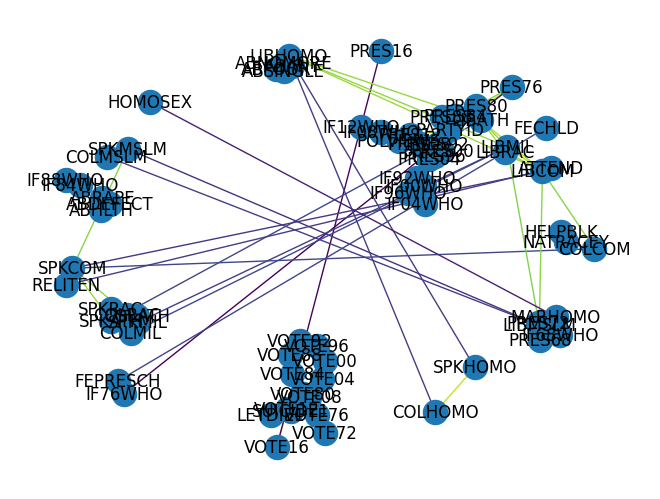

In [118]:
import numpy as np
from pingouin import partial_corr


def pairwise_correlations(vars, data, method, partial=True):
    """
    for list of variables `vars` which are names of columns in the dataframe `data`, calculate the  partial correlations of
    all pairs of variables conditioned on all other variables. use correlation type `method` (either "spearman" or "pearson")
    """
    corr_dfs = []
    corr_mat = np.zeros((len(vars), len(vars)))

    for i in range(len(vars)):
        for j in range(i+1, len(vars)):
            if partial:
                covar_list = vars[:i] + vars[i+1:j] + vars[j+1:]
            else:
                covar_list = None
            
            corr_df = partial_corr(data=data, x=vars[i], y=vars[j], covar=covar_list, alternative='two-sided', method=method)
            corr_df["x"] = i
            corr_df["y"] = j
            corr_mat[i, j] = corr_df.loc[method, "r"]
            corr_mat[j, i] = corr_df.loc[method, "r"]
            corr_dfs.append(corr_df)

    corr_info = pd.concat(corr_dfs)
    np.fill_diagonal(corr_mat, 1)
    return corr_info, corr_mat  


# Get the partial correlations
column_codes = ["POLVIEWS (mapped)", "PARTY_ID (mapped)", 'HELPPOOR (mapped)', 'HOMOSEX (mapped)']
partial_corr_info, partial_corr_matrix = pairwise_correlations(column_codes, df, 'spearman', partial=True)


print(partial_corr_matrix)

[[ 1.          0.36347127 -0.14869573  0.27064135]
 [ 0.36347127  1.         -0.23942393  0.00779447]
 [-0.14869573 -0.23942393  1.         -0.01542114]
 [ 0.27064135  0.00779447 -0.01542114  1.        ]]


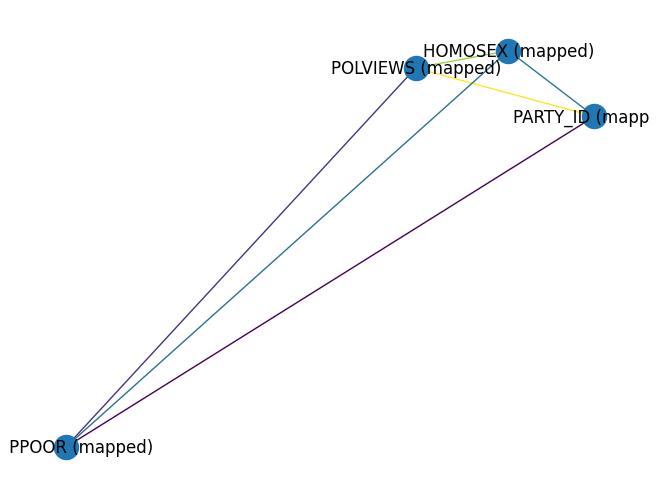

In [116]:
import networkx as nx

correlation_matrix = partial_corr_matrix

# Set all NaNs to zero in the correlation matrix
# correlation_matrix = correlation_matrix.fillna(0)

# Convert the correlation matrix to an adjacency matrix
G = nx.Graph()

for i in range(len(column_codes)):
    for j in range(i+1, len(column_codes)):
        # Only add an edge if the weight is above a certain threshold
        # if abs(correlation_matrix.iloc[i, j]) > 0.5:
        #     G.add_edge(column_codes[i], column_codes[j], weight=correlation_matrix.iloc[i, j])
        G.add_edge(column_codes[i], column_codes[j], weight=correlation_matrix[i, j])



# Colour the edges by their weight. -1 is red, 1 is green
edge_colors = [e[2]['weight'] for e in G.edges(data=True)]

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, edge_color=edge_colors, with_labels=True)
plt.show()

# Save the graph as a graphml
nx.write_graphml(G, 'test_BN_2.graphml')